In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [149]:
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sustainify_20.09.24/merged_daily_new_lab.csv')

In [151]:
df.isnull().sum()

,0
Price,0
date,0


In [152]:
df

,Price,date
0,47.803208,2010-07-21
1,58.061250,2010-07-22
2,46.146042,2010-07-23
3,43.593292,2010-07-24
4,19.148125,2010-07-25
...,...,...
2715,30.209583,2017-12-27
2716,33.220417,2017-12-28
2717,23.760000,2017-12-29
2718,24.729167,2017-12-30


In [153]:
df.set_index('date', inplace=True)
df.index = pd.to_datetime(df.index)
df.head()

,Price
date,
2010-07-21,47.803208
2010-07-22,58.061250
2010-07-23,46.146042
2010-07-24,43.593292
2010-07-25,19.148125


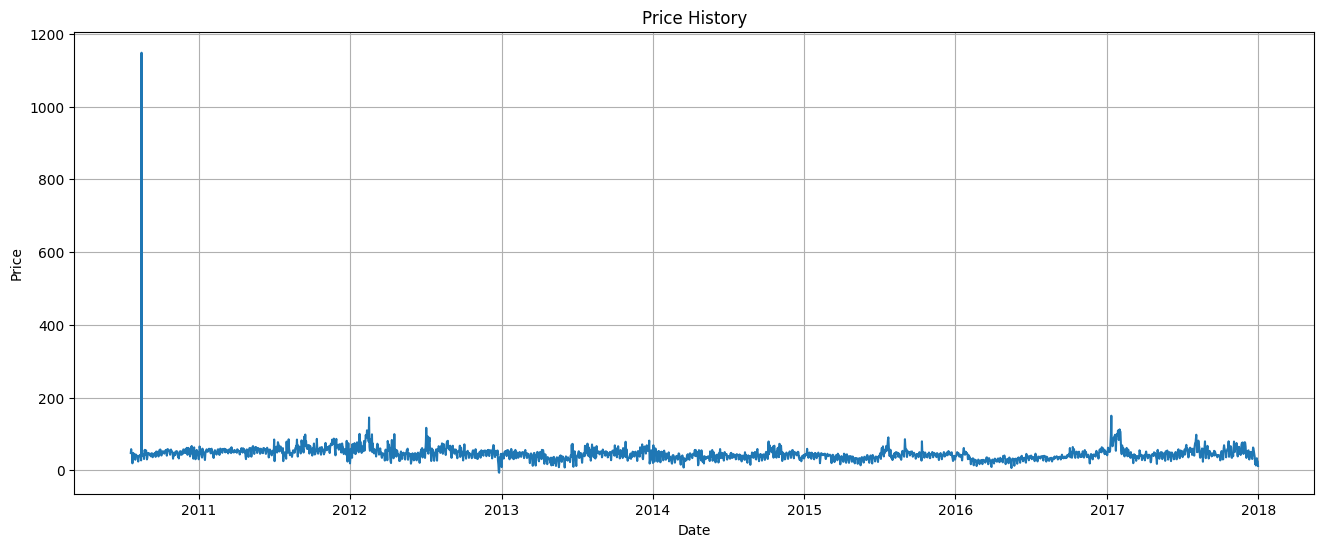

In [154]:
plt.figure(figsize=(16,6))
plt.title('Price History')
plt.plot(df['Price'])
plt.xlabel('Date', fontsize=10)
plt.ylabel('Price', fontsize=10)
plt.grid(True)
plt.show()

In [155]:
negative_values_count = (df['Price'] < 0).sum()
print(negative_values_count)
negative_values = df[df['Price'] < 0]
print(negative_values)

2
               Price
date                
2012-12-25 -5.256250
2012-12-26 -6.710417


In [156]:
df = df.drop(['2010-08-16','2012-12-25','2012-12-26'])

<Axes: >

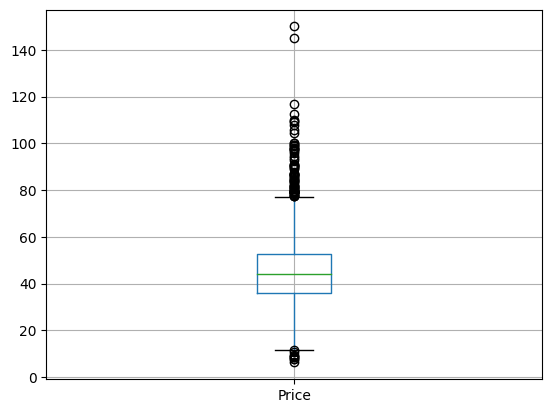

In [157]:
df.boxplot()

<Axes: xlabel='date'>

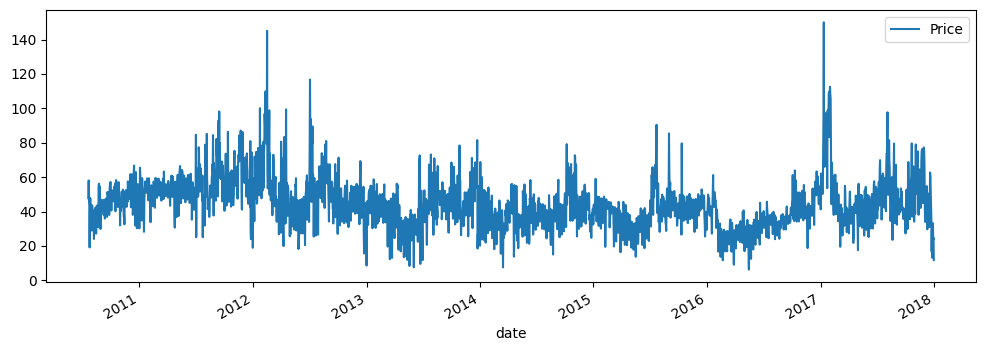

In [158]:
df.plot(figsize=(12,4))

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

Data Preprocessing

In [160]:
# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [161]:
# Splitting into train and test (predict 2017 and future 2018)
train_data = scaled_data[:int(len(df)*0.95)]  # 95% for training
test_data = scaled_data[int(len(df)*0.95):]   # last 5% for 2017 prediction

In [162]:
# Create sequences of 60 time steps for LSTM input
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

In [163]:
time_step = 60
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

In [164]:
# Reshape to 3D for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Building the LSTM model

In [165]:
model = Sequential()
model.add(LSTM(units=150, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [166]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.6555
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.5494
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.5623
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5485
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5532
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5757
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5105
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5024
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.5238
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4816
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4695
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.4781
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.4724
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.4245
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.4271
Epoc

Predicting for 2017 and comparing with actual values

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step


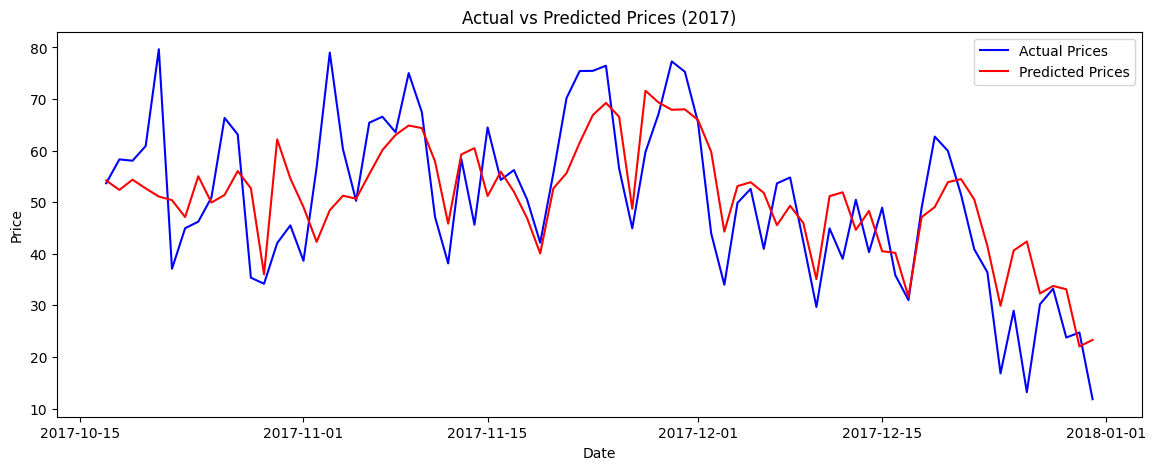

In [167]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Inverse transform for the actual values to get the original scale
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting actual vs predicted for 2017
plt.figure(figsize=(14,5))
plt.plot(df.index[-len(predicted_prices):], y_test, color='blue', label='Actual Prices')
plt.plot(df.index[-len(predicted_prices):], predicted_prices, color='red', label='Predicted Prices')
plt.title('Actual vs Predicted Prices (2017)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Predicting for the whole year 2018

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

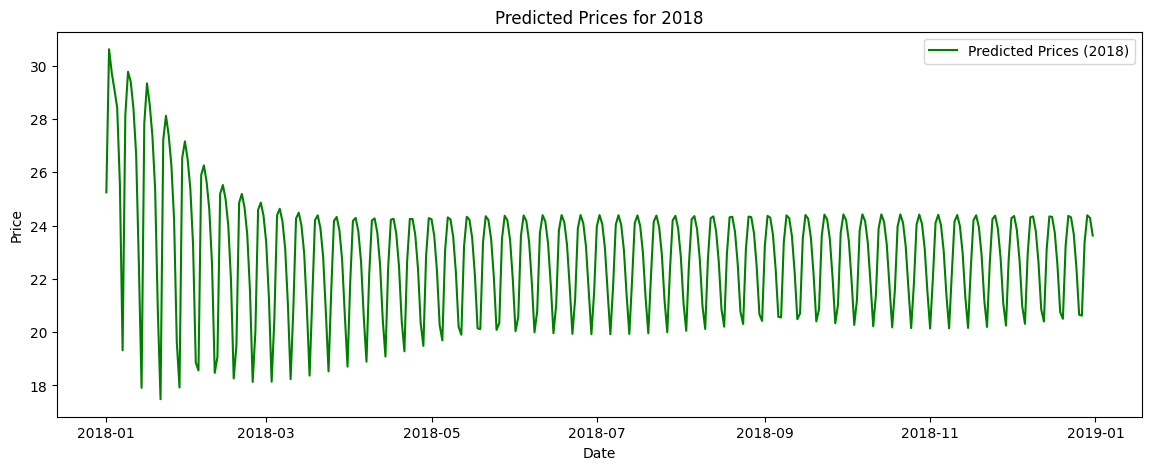

In [168]:
# Preparing input for 2018 prediction
last_train_data = scaled_data[-time_step:]  # Last 60 days of 2017
predictions_2018 = []

current_input = last_train_data.reshape(1, time_step, 1)

for i in range(365):  # Predict 365 days of 2018
    predicted_value = model.predict(current_input)
    predictions_2018.append(predicted_value[0, 0])

    # Update the current input with the predicted value
    predicted_value_reshaped = predicted_value.reshape(1, 1, 1)  # Reshape to (1, 1, 1) to match LSTM input
    current_input = np.append(current_input[:, 1:, :], predicted_value_reshaped, axis=1)

# Rescale predictions back to the original range
predictions_2018 = scaler.inverse_transform(np.array(predictions_2018).reshape(-1, 1))

# Create date range for 2018
dates_2018 = pd.date_range(start='2018-01-01', periods=365, freq='D')

# Plot the 2018 predictions
plt.figure(figsize=(14,5))
plt.plot(dates_2018, predictions_2018, color='green', label='Predicted Prices (2018)')
plt.title('Predicted Prices for 2018')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()